<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithday_allday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/total_dam.csv',encoding='utf-8')

In [45]:
data.index = data['date']
data

,date,dam,dam_avg_rain,Y
date,,,,
1974-01-01,1974-01-01,10.000,0.0000,10.000
1974-01-02,1974-01-02,9.000,0.0000,9.000
1974-01-03,1974-01-03,4.800,0.0000,4.800
1974-01-04,1974-01-04,6.100,0.0000,6.100
1974-01-05,1974-01-05,5.800,0.0000,5.800
...,...,...,...,...
2023-12-27,2023-12-27,25.873,0.0000,25.873
2023-12-28,2023-12-28,21.186,0.0000,21.186
2023-12-29,2023-12-29,20.887,0.0000,20.887


In [46]:
data = data.fillna(0)

In [47]:
print(max(data['dam']))

7405.6


In [48]:
data['Y'] = data['dam']
data = data.dropna()

train = data[data['date']<'2009-01-01']
valid = data[data['date']>='2009-01-01']
valid = valid[valid['date']<'2017-01-01']
test = data[data['date']>='2017-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['date', 'Y'], axis = 1), train['Y']
# trainX = trainX.to_numpy()
# trainY = trainY.to_numpy()
# trainX = trainX.reshape(trainX.shape[0], trainX.shape[1],1)

validX, validY = valid.drop(['date', 'Y'], axis = 1), valid['Y']
# validX = validX.to_numpy()
# validY = validY.to_numpy()
# validX = validX.reshape(validX.shape[0], validX.shape[1],1)

testX, testY = test.drop(['date','Y'], axis = 1), test['Y']
# testX = testX.to_numpy()
# testY = testY.to_numpy()
# testX = testX.reshape(testX.shape[0], testX.shape[1],1)


train set :  12776 
 valid set :  2920 
 test set :  2554 



In [49]:
print(trainX.shape, trainY.shape)

print(trainX)

(12776, 2) (12776,)
               dam  dam_avg_rain
date                            
1974-01-01  10.000           0.0
1974-01-02   9.000           0.0
1974-01-03   4.800           0.0
1974-01-04   6.100           0.0
1974-01-05   5.800           0.0
...            ...           ...
2008-12-27   4.515           0.0
2008-12-28   0.000           0.0
2008-12-29   4.083           0.0
2008-12-30   0.000           0.0
2008-12-31   0.000           0.0

[12776 rows x 2 columns]


In [50]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

modelnew = Sequential()

modelnew.add(LSTM(64, input_shape = (2,1)))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(40, 'relu'))
modelnew.add(Dense(8, 'relu'))
modelnew.add(Dense(8))
modelnew.add(Dense(1))

modelnew.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 40)                2600      
                                                                 
 dense_6 (Dense)             (None, 40)                1640      
                                                                 
 dense_7 (Dense)             (None, 8)                 328       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545

In [51]:
cp1 = ModelCheckpoint('modelnew/', save_best_only=True)
modelnew.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
modelnew.fit(trainX, trainY, validation_data = (validX, validY), batch_size = 10, epochs=50, callbacks=[cp1])

Epoch 1/50
1278/1278 [==============================] - 14s 9ms/step - loss: 50913.7500 - root_mean_squared_error: 225.6407 - val_loss: 29521.5586 - val_root_mean_squared_error: 171.8184
Epoch 2/50
1278/1278 [==============================] - 12s 9ms/step - loss: 29165.2070 - root_mean_squared_error: 170.7782 - val_loss: 13590.3125 - val_root_mean_squared_error: 116.5775
Epoch 3/50
1278/1278 [==============================] - 11s 8ms/step - loss: 17525.5000 - root_mean_squared_error: 132.3839 - val_loss: 6606.4961 - val_root_mean_squared_error: 81.2804
Epoch 4/50
1278/1278 [==============================] - 10s 7ms/step - loss: 12496.4209 - root_mean_squared_error: 111.7874 - val_loss: 5044.7163 - val_root_mean_squared_error: 71.0262
Epoch 5/50
1278/1278 [==============================] - 11s 8ms/step - loss: 9445.3066 - root_mean_squared_error: 97.1870 - val_loss: 2723.7615 - val_root_mean_squared_error: 52.1897
Epoch 6/50
1278/1278 [==============================] - 11s 8ms/step - lo

In [52]:
train_score = modelnew.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

80/80 [==============================] - 1s 3ms/step - loss: 2147.7959 - root_mean_squared_error: 46.3443
Train Score: 2147.80 MSE (46.34 RMSE)


In [53]:
# from tensorflow.keras.models import load_model
# model = load_model('model/')

train_predictions = modelnew.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

400/400 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
date,,
1974-01-01,11.190339,10.000
1974-01-02,10.295921,9.000
1974-01-03,6.478729,4.800
1974-01-04,7.696298,6.100
1974-01-05,7.418716,5.800
...,...,...
2008-12-27,6.210026,4.515
2008-12-28,9.872277,0.000
2008-12-29,5.809218,4.083


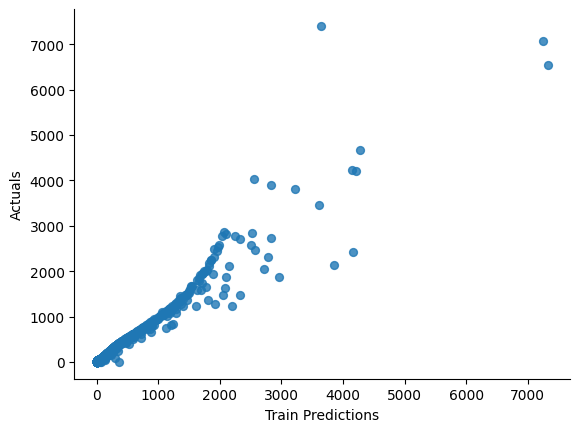

In [54]:
# @title Train Predictions vs Actuals

from matplotlib import pyplot as plt
train_results.plot(kind='scatter', x='Train Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

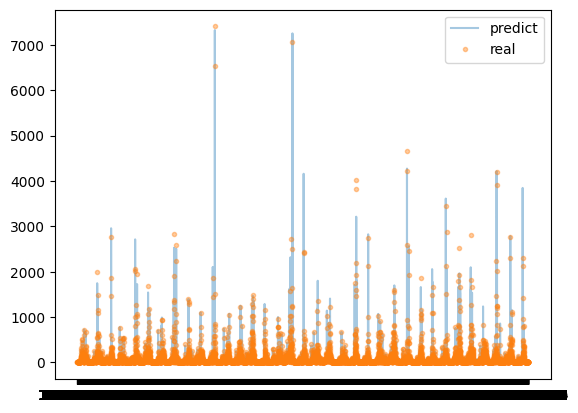

In [55]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:], alpha = 0.4)
plt.plot(train_results['Actuals'][:],'.', alpha = 0.4)

plt.legend(['predict','real'])

In [56]:
val_predictions = modelnew.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

92/92 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
date,,
2009-01-01,9.872277,0.000
2009-01-02,6.388607,0.825
2009-01-03,5.647861,3.904
2009-01-04,9.872277,0.000
2009-01-05,9.872277,0.000
...,...,...
2016-12-27,49.476959,48.734
2016-12-28,52.442066,48.803
2016-12-29,40.111919,37.903


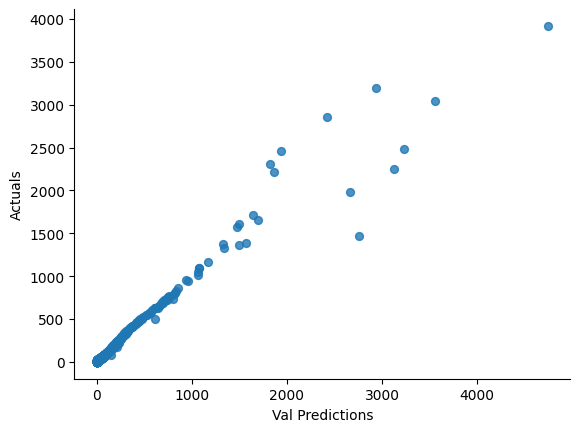

In [57]:
# @title Val Predictions vs Actuals

from matplotlib import pyplot as plt
val_results.plot(kind='scatter', x='Val Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

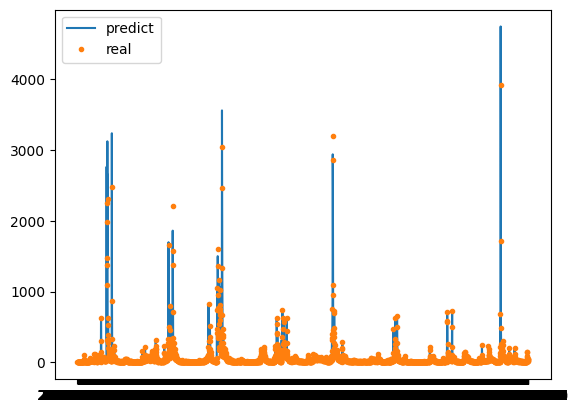

In [58]:
plt.plot(val_results['Val Predictions'][:])
plt.plot(val_results['Actuals'][:],'.')

plt.legend(['predict','real'])

In [59]:
test_predictions = modelnew.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

80/80 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
date,,
2017-01-01,24.844442,23.795
2017-01-02,24.881098,23.830
2017-01-03,19.281736,18.401
2017-01-04,30.749298,29.361
2017-01-05,24.759748,23.988
...,...,...
2023-12-27,27.030598,25.873
2023-12-28,22.131796,21.186
2023-12-29,21.823385,20.887


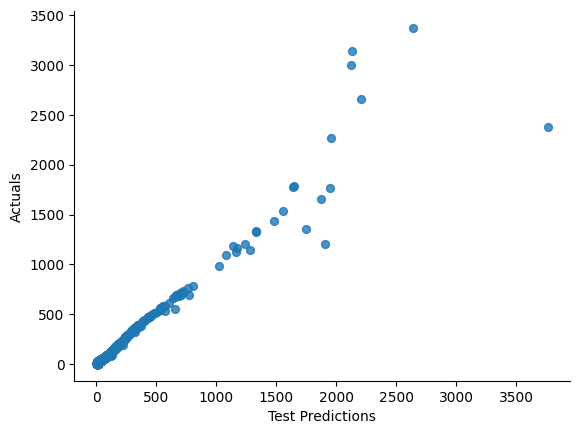

In [60]:
# @title Test Predictions vs Actuals

from matplotlib import pyplot as plt
test_results.plot(kind='scatter', x='Test Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

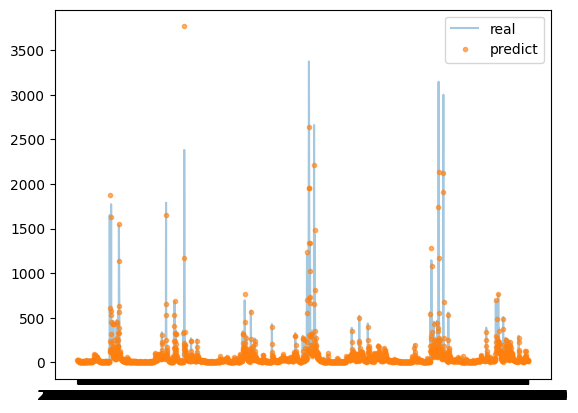

In [61]:
plt.plot(test_results['Actuals'][:], alpha=0.4)
plt.plot(test_results['Test Predictions'][:],'.',alpha = 0.6)

plt.legend(['real', 'predict'])

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : 0.943217
RMSE : 46.34


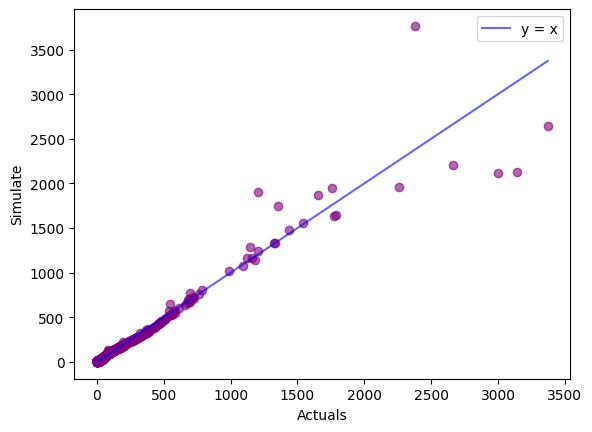

In [63]:
x = np.arange(0,max(test_results['Actuals']))
y = x
plt.scatter(test_results['Actuals'][:], test_results['Test Predictions'][:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'blue', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()

In [64]:
test_results.reset_index()
test_results['Actuals']

date
2017-01-01    23.795
2017-01-02    23.830
2017-01-03    18.401
2017-01-04    29.361
2017-01-05    23.988
               ...  
2023-12-27    25.873
2023-12-28    21.186
2023-12-29    20.887
2023-12-30    29.183
2023-12-31    25.803
Name: Actuals, Length: 2554, dtype: float64

In [65]:
# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(test_results['Actuals'][:])
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1**2
  num2 = test_results['Actuals'][i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

NSE : 0.943217


In [66]:
# PBIAS
num_sum1 = 0
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(test_results['Actuals'][:])) * 100
print('PBIAS : %f' %pbias)

PBIAS : -0.333605


In [67]:
#R^2
import math

num_sum1 = 0
num_sum2 = 0
num_sum3 = 0
act_avg = mean(test_results['Actuals'][:])
pred_avg = mean(test_results['Test Predictions'][:])
for i in range(len(test_results)):
  num1 = (test_results['Actuals'][i] - act_avg) * (test_results['Test Predictions'][i] - pred_avg)
  num_sum1 += num1
  num2 = test_results['Actuals'][i] - pred_avg
  num_sum2 += num2**2
  num3 = test_results['Test Predictions'][i] - pred_avg
  num_sum3 += num3**2

r_square = (num_sum1 / (math.sqrt(num_sum2)* math.sqrt(num_sum3)))**2
print('R Square : %f' %r_square)

R Square : 0.943229
